Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Helper functions

In [5]:
def load_data_chunk(filename, chunk_size=1000):
    """ Load a chunk of data from a gzipped TSV file. """
    return pd.read_csv(filename, sep='\t', compression='gzip', chunksize=chunk_size)

def load_first_chunk_directly(file_name, chunk_size):
    file_path = f'/dtu-compute/datasets/iso_02456/{file_name}'
    # Read only the first 'chunk_size' rows of the file (the first chunk)
    df = pd.read_csv(file_path, compression='gzip', header=0, sep='\t', quotechar='"', nrows=chunk_size)
    return df

# archs4_first_chunk = load_first_chunk_directly('archs4_gene_expression_norm_transposed.tsv.gz', chunk_size)

Load data

In [9]:
# Define the file paths
archs4_path = "/dtu-compute/datasets/iso_02456/archs4_gene_expression_norm_transposed.tsv.gz"
gtex_gene_path = "/dtu-compute/datasets/iso_02456/gtex_gene_expression_norm_transposed.tsv.gz"
gtex_isoform_path = "/dtu-compute/datasets/iso_02456/gtex_isoform_expression_norm_transposed.tsv.gz"
gtex_anno_path = "/dtu-compute/datasets/iso_02456/gtex_gene_isoform_annoation.tsv.gz"
gtex_tissue_path = "/dtu-compute/datasets/iso_02456/gtex_annot.tsv.gz"


archs4_chunk = next(load_data_chunk(archs4_path, chunk_size=10))
gtex_gene_chunk = next(load_data_chunk(gtex_gene_path, chunk_size=10))
gtex_isoform_chunk = next(load_data_chunk(gtex_isoform_path, chunk_size=10))
gtex_anno_chunk = next(load_data_chunk(gtex_anno_path, chunk_size=10))
gtex_tissue_chunk = next(load_data_chunk(gtex_tissue_path, chunk_size=10))

Data exploration

In [10]:
# Example for one dataset
print(archs4_chunk.shape)
print(archs4_chunk.head())
archs4_chunk.describe()

(10, 18966)
    sample_id      A1BG      A1CF       A2M     A2ML1   A3GALT2    A4GALT  \
0  GSM4747249  2.808001  0.146667  1.522200  1.951247  0.000000  0.761953   
1  GSM4063503  2.392233  0.036178  7.570420  0.699714  0.152128  2.384229   
2  GSM4631135  4.288390  0.777380  1.597797  1.297746  0.000000  1.765906   
3  GSM5374404  2.644249  0.092517  0.094436  0.924249  0.000000  0.045038   
4  GSM4891113  4.136538  0.000000  6.873902  0.000000  0.000000  1.854200   

      A4GNT      AAAS      AACS  ...    ZWILCH     ZWINT      ZXDA      ZXDB  \
0  0.000000  2.180121  3.665097  ...  2.573919  1.071359  0.498314  0.000000   
1  0.000000  3.093951  2.633251  ...  1.647097  2.084497  0.074117  0.335072   
2  0.072869  7.404695  5.880534  ...  5.007085  7.096970  1.015069  2.342714   
3  0.033435  6.204663  3.079830  ...  4.087812  6.756117  0.212525  1.424847   
4  0.000000  4.083567  5.713674  ...  2.979250  2.514846  1.253094  1.885699   

       ZXDC    ZYG11A    ZYG11B       ZYX   

,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,2.914253,1.161985,2.736391,0.733740,0.028405,1.467521,0.032041,4.885823,4.532398,0.816950,...,3.810000,4.703844,0.866003,1.793644,2.774589,1.005060,2.289029,6.502139,2.915470,4.316298
std,1.634860,1.656881,2.746807,0.587558,0.060072,1.049281,0.057955,1.499184,1.155333,1.863849,...,1.500157,2.532367,0.586458,1.098272,1.717009,0.992893,0.890759,2.155059,1.270440,1.212484
min,0.281666,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.180121,2.633251,0.000000,...,1.528099,1.071359,0.074117,0.000000,0.000000,0.014633,1.089335,0.782139,1.199932,2.207346
25%,2.455237,0.065392,0.736515,0.348123,0.000000,0.619001,0.000000,4.215482,3.673877,0.000000,...,2.675252,2.192084,0.303721,1.270832,1.404825,0.164078,1.570809,6.459385,1.981903,3.962455
50%,2.776604,0.147519,1.559998,0.695602,0.000000,1.810053,0.000000,5.171919,5.074258,0.032164,...,4.447917,5.870054,0.993472,1.776932,2.893821,0.700390,2.331740,6.867337,2.848284,4.481401
75%,4.061326,2.184477,4.221820,0.921204,0.000000,2.268435,0.033175,5.491801,5.296099,0.403799,...,4.988178,6.733668,1.247133,2.588420,4.286638,1.906778,2.680037,7.557019,3.817250,5.022024
max,5.504408,4.484502,7.570420,1.951247,0.152128,2.984220,0.181709,7.404695,5.880534,5.962025,...,5.525404,7.382543,1.873337,3.303075,5.034469,2.538329,3.637858,8.633802,4.833084,5.927927


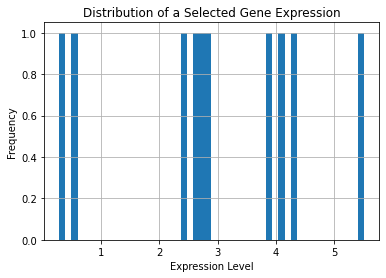

In [11]:
# Histogram for a selected column in archs4_chunk
archs4_chunk.iloc[:, 1].hist(bins=50)
plt.title('Distribution of a Selected Gene Expression')
plt.xlabel('Expression Level')
plt.ylabel('Frequency')
plt.show()


PCA analysis

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler